In [3]:
%pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 1.8/376.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 2.9/376.0 MB 4.3 MB/s eta 0:01:27
   ---------------------------------------- 3.7/376.0 MB 4.2 MB/s eta 0:01:29
   ---------------------------------------- 4.5/376.0 MB 4.1 MB/s eta 0:01:30
    --------------------------------------- 5.2/376.0 MB 4.1 MB/s eta 0:01:31
    --------------------------------------- 6.0/376.0 MB 4.1 MB/s eta 0:01:32
    --------------------------------------- 7.1/376.0 MB 4.0 MB/s eta 0:01:32
    --------------------------------------- 7.9/376.0 MB 4.0 MB/s eta 0:01:32
    --------------------------------------- 8.7/376.0 MB 4.0 MB/s eta 0:01:32
   - -------------------------------------- 9.4/376.0 MB 4.0 MB/s eta 0:01:32
   - -------------------------------------- 10.2/376.0 MB 4.0 MB/s eta 

In [7]:
%pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow_hub
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00



In [3]:
%pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/39.5 MB 5.6 MB/s eta 0:00:07
   - -------------------------------------- 1.8/39.5 MB 3.9 MB/s eta 0:00:10
   -- ------------------------------------- 2.9/39.5 MB 4.4 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/39.5 MB 4.3 MB/s eta 0:00:09
   ---- ----------------------------------- 4.5/39.5 MB 4.2 MB/s eta 0:00:09
   ----- ---------------------------------- 5.2/39.5 MB 4.1 MB/s eta 0:00:09
   ----- ---------------------------------- 5.2/39.5 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.6/39.5 MB 3.7 MB/s eta 0:00:09
   ------- -------------------------------- 7.1/39.5 MB 3.7 MB/s eta 0:00:09
   ------- -------------------------------- 7.6/39.5 MB 3.6 MB/s eta 0:00:09
   -------- ------------------------------- 8.1/39.5 MB 3.5 MB/s eta 0:00:10
   --------- ------------------------------ 8.9/39.5 MB 3.4 MB/s eta 0:00:09
   ---

In [5]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [8]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [10]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels = 3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [19]:
content_image = load_image('profile.jfif')
style_image = load_image('monet.jpeg')

In [21]:
content_image.shape

TensorShape([1, 200, 200, 3])

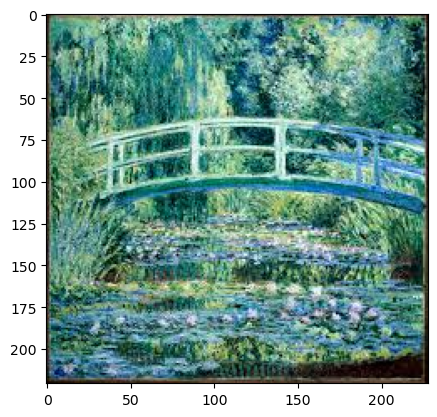

In [23]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [25]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

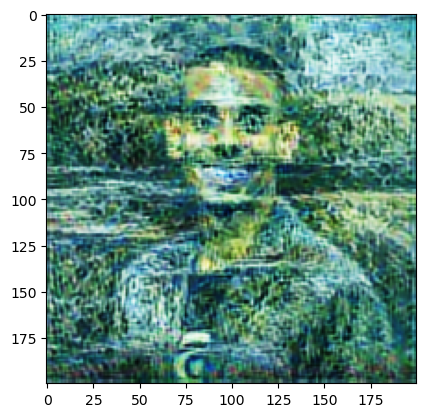

In [27]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [29]:
cv2.imwrite('generated_image.jpg',cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True